<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/06_Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# inbuilt dataset from keras 
(xtrain, ytrain),(xtest,ytest) = keras.datasets.fashion_mnist.load_data()
print(len(xtrain))
print(len(ytrain))


4423680/4422102 [==============================] - 0s 0us/step
60000
60000


In [7]:
print(xtrain.shape) # 60,000 sample -> (28,28) image sizes 
xtrain[0]



(60000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Ankle boot


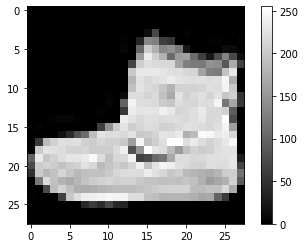

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[ytrain[0]])
plt.figure()
plt.imshow(xtrain[0], cmap='gray')
plt.colorbar()
plt.show()

Shirt


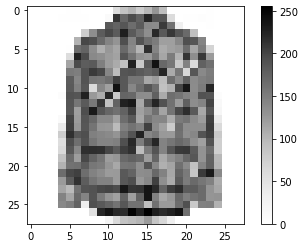

In [20]:
print(class_names[ytrain[32]])
plt.figure()
plt.imshow(xtrain[32], cmap='Greys')
plt.colorbar()
plt.show()

Shirt


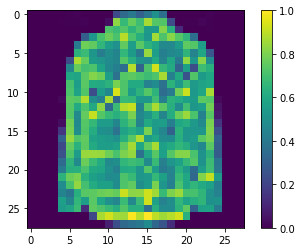

In [25]:
# NUMBERS are also a MYTHICAL REFERENCE POINT 
# COMPARISON -> in a graph, as long as SCALE is defined, numbers are just a SCALAR value! 
# SCALAR values can scale -> if i multiply 2 to it, the result will be twice the quantity! 
# VECTORS -> VECTOR rules, non-scalar, DIRECTION is just the slope of points -> (y2-y1)/(x2-x1)
# SCALAR values on a GRAPH -> Are just a reference point! 
img = xtrain[32]/255 # ALl the numbers will become between 0 and 1! 
# min -> 0/255 = 0! max -> 255/255 -> 1 
# every other value scaled in between!
print(class_names[ytrain[32]])
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.show()

In [0]:
# we can normalize entire input data! 
xtrain_norm = xtrain/255
xtest_norm = xtest/255 


In [0]:
# OUR ALGO: I need to CONSIDER my images as a 1-D array and find patterns in that array instead
# Convert into 1-D Array -> PATTERN_RECOG 
HP_hiddenDimensions = 128
HP_epochs = 40 

# https://en.wikipedia.org/wiki/Activation_function 
model = keras.Sequential() # this creates a "SEQUENTIAL MODEL"-> layers one-after-the-other 

model.add(keras.layers.Flatten(input_shape=(28,28))) # INPUT LAYER
model.add(keras.layers.Dense(HP_hiddenDimensions, activation=tf.nn.relu)) #HIDDEN LAYER
model.add(keras.layers.Dense(10, activation=tf.nn.softmax)) # OUTPUT LAYER



# EPOCH: How many times to RUN the network? 
# in last TF example, we were conducting REPEAT via STEPS in a LOOP 
# WE create a lifecycle -> LOOKING at the SAME data AGAIN AND AGAIN! 
# EPOCH -> timelines of NN, how many times to repeat?



In [50]:
model.summary()
# https://stackoverflow.com/questions/47312219/what-is-the-definition-of-a-non-trainable-parameter
# NOTE: In above, the marked correct answer is wrong, check the most voted
# one


# FLATTENING LAYER -> job is to convert mult-dim arrays into 1-D array
# so on 28X28 = 784
# 2 2 2
# 2 3 2   ---->     2 2 2 2 3 2 1 1 0
# 1 1 0 
# Do i need ANY weights or biases at all for this conversion? 
# AND THAT IS WHY-> PARAM (W, B) are 0 for flattening layer

# DENSE LAYER (128)
# 1 element was breaking into 128 elements 
# 784 elements here!!! 
# HOW MANY W, B 
# 784 X 128 -> no. of weights 
# 128 bias will be generated! => 784 X 128 + 128 = 100352 + 128 = 100480
# y = mx + c, 784 y's are being calculated

# DENSE LAYER (10)
# 1 element -> 10 elements 
# 128 elements ->  128 X 10 + 10 = 1280 weights + 10 bias = 1290! 
# BIAS = 10 bias


# Flattening -> INPUT SIZE -> 28,28    OUTPUT SIZE -> 28X28=784! W,B = 0
# Dense -> INPUT SIZE-> 128,    OUTPUT SIZE -> 128 X 784;    W=100352, B=128
# Dense -> INput Size-> 784, output-> 10, W,B = 1280, 10


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# COMPILATION of model is 3 parts:
# HOW TO MODIFY THE LEARNING RATE -> hence LOSS is also modified (OPTIMIZER FUNCTION)
# HOW TO CALCULATE THE LOSS
# HOW TO MEASURE THE LOSS 

# KERAS HAS A LOT OF PREDEFINED OPTIMIZERS and LOSS functions 
# OPTIMIZER GENERAL PURPOSE -> GMAT or GRE -> correct answer-> next question is difficult
# incorrectly answered -> next questions are EASY 
# By sequence of correct/incorrect answers, the TEST knows where a candidate stands in terms of complexity
# ADAPTIVE LEARNING! 

# In KERAS -> RMSProp -> Root Mean Squared Propogation
# RMSProp with a MOMENTUM -> ADAM optimizer (MOMENTUM is a FORCE in a direction)
# https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/

# LOSS FUNCTIONS -> HOW TO CALCULATE -> THE FORMULA for CALCULATION
# CATEGORICAL problems -> we have 2 kinds of classifications 
# BINARY and MULTICLASS (TOMORROW MORNING-> remember)
# BINARY_CROSSENTROPY and SPARSE_CATEGORICAL_CROSSENTROPY 
# Minkowski 

# HOW TO MEASURE THE LOSS -> ACCURACY, RMSE, MAE, Precision, LOSS 
# MSE, MAE -> they measure NUMBERS 
# CLASSFICIATION -> Accuracy, precision, recall, F1 Score
# Regression -> RMSE, MAE 

# IMAGES -> MSE 

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# AFTER compiling, model has complete info to build the DAG 
# hence we can begin training process 

In [0]:
# the results of training are important 
HP_epochs = 30 
history = model.fit(xtrain_norm, ytrain, epochs=HP_epochs)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5051 - acc: 0.8218
Epoch 2/30
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3773 - acc: 0.8637
Epoch 3/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3389 - acc: 0.8754
Epoch 4/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3137 - acc: 0.8847
Epoch 5/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2956 - acc: 0.8901
Epoch 6/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2820 - acc: 0.8944
Epoch 7/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2700 - acc: 0.8997
Epoch 8/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2589 - acc: 0.9027
Epoch 9/30
 3648/60000 [>.............................] - ETA: 3s - loss: 0.2428 - acc: 0.9109

In [40]:
model.fit(xtrain_norm, ytrain, epochs=5)
# OBSERVE that model doesn't start learning from SCRATCH
# picks up where it left in previous training 

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1788 - acc: 0.9334
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1745 - acc: 0.9342
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1701 - acc: 0.9350
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1666 - acc: 0.9384
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1618 - acc: 0.9405


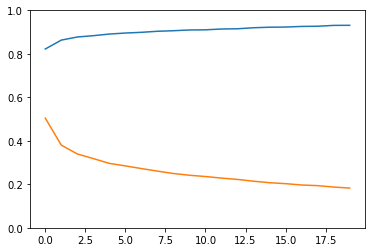

In [46]:
# How do we manage epochs? what no. is right or wrong?
# EPOCHS shouldn't be a waste of time
# if for a time period, my LOSS is not decreasing any further or metrics not improving
# then it was a WASTE of time to keep learning! 

acc_y = history.history['acc']
loss_y = history.history['loss']
plt.figure()
plt.plot(range(HP_epochs), acc_y)
plt.plot(range(HP_epochs), loss_y)
plt.ylim(0,1) # SCALE values between 0 and 1 
plt.show() 



In [0]:
# THis means, that numbers could all be normalizing, without LOSING
# the actual meaning of our data
# If i divide my entire data or multiply with certain number -> MY DATA WOULD NOT CHANGE!
# why would it not change? BECAUSE we are not trying to form a add/mul between points
# we are trying to compare them -> we know 3 is 1+1+1 
# so 3 was thrice larger! 

In [0]:
# WHY TRAINING AGAIN AND AGIAN? WHY EPOCHS?

# NN are expensive -> hence they work in time-bursts 
# these time bursts are not enough to know EVERY detail about the data 
# so EPOCH 1 -> MODEL learns all it can about the data -> and then SAVE that learning 
# in next EPOCH -> MODEL DOESN't START from scratch, but resumes from where it LEFT! 

# MORE THE EPOCHS -> MORE THE LEARNING -> TOO MANY EPOCHS = OVERFITTING! 


